In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

(-0.9702555541783507,
 3.9113383416433583,
 -0.09822067598002898,
 2.0626341955806082)

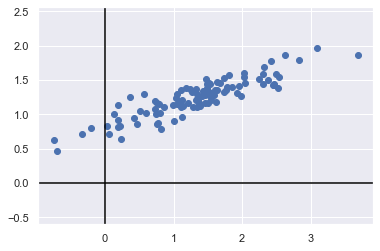

In [2]:
r = np.random.RandomState(1)
X = np.dot(r.rand(2,2), r.randn(2,100)).T
X2 = X + 1.2
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0
plt.scatter(X2[:,0], X2[:,1])
plt.axis('equal')

(-2.2587175765305116,
 2.6228763192911972,
 -0.8996623046914862,
 0.7509807259122236)

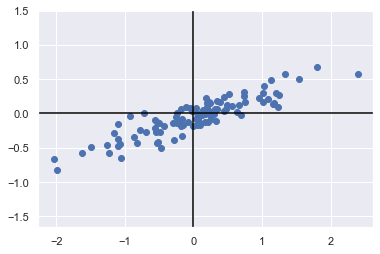

In [3]:
x_mean = X2 - X2.mean()
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0
plt.scatter(x_mean[:,0], x_mean[:,1])
plt.axis('equal')

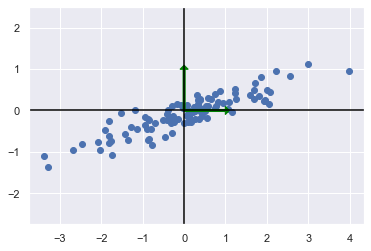

In [25]:
x_std = x_mean/X.std(ddof=1)
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0
plt.scatter(x_std[:,0], x_std[:,1])
plt.axis('equal')
plt.arrow(0,0,0,np.var(x_std),head_width=0.2, head_length=0.1, width=0.05, color='green')
plt.arrow(0,0,np.var(x_std),0,head_width=0.2, head_length=0.1, width=0.05, color='green')

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_std)

PCA(n_components=2)

In [6]:
print(pca.components_)

[[ 0.95257252  0.30431168]
 [-0.30431168  0.95257252]]


In [7]:
print(pca.explained_variance_)

[1.95894005 0.04074277]


In [8]:
for l, v in zip(pca.explained_variance_, pca.components_):
    vs = v * 3 * np.sqrt(l)
    print(pca.mean_)
    print(pca.mean_ + vs)

[ 0.07181226 -0.07181226]
[4.0715349  1.20595114]
[ 0.07181226 -0.07181226]
[-0.1124622   0.50501341]


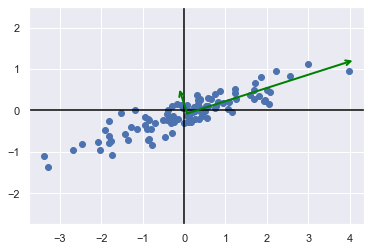

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='green')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0
plt.scatter(x_std[:, 0], x_std[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

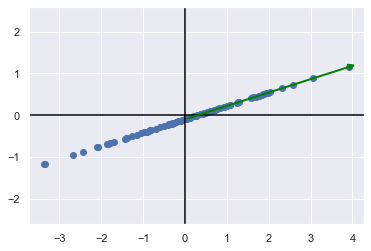

In [45]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(x_std)
X_new = pca.inverse_transform(X_pca)
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0
plt.scatter(X_new[:, 0], X_new[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
#plt.plot([-4, 5],[-1.4, 1.5], color='red')
plt.axis('equal');

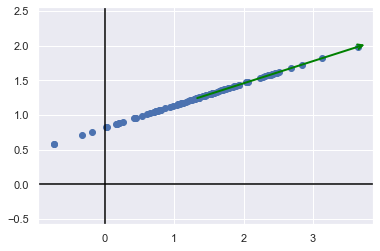

In [46]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X2)
X_new = pca.inverse_transform(X_pca)
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0
plt.scatter(X_new[:, 0], X_new[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
#plt.plot([-0.8, 3.7],[0.55, 2], color='red')
plt.axis('equal');